___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")

# EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,54.3663,0.6832,0.9670,131.6238,246.2640,0.1485,0.5281,149.6469,0.3267,1.0396,1.3993,0.7294,2.3135,0.5446
std,9.0821,0.4660,1.0321,17.5381,51.8308,0.3562,0.5259,22.9052,0.4698,1.1611,0.6162,1.0226,0.6123,0.4988
min,29.0000,0.0000,0.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,47.5000,0.0000,0.0000,120.0000,211.0000,0.0000,0.0000,133.5000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000
50%,55.0000,1.0000,1.0000,130.0000,240.0000,0.0000,1.0000,153.0000,0.0000,0.8000,1.0000,0.0000,2.0000,1.0000
75%,61.0000,1.0000,2.0000,140.0000,274.5000,0.0000,1.0000,166.0000,1.0000,1.6000,2.0000,1.0000,3.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,4.0000,3.0000,1.0000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0000,-0.0984,-0.0687,0.2794,0.2137,0.1213,-0.1162,-0.3985,0.0968,0.2100,-0.1688,0.2763,0.0680,-0.2254
sex,-0.0984,1.0000,-0.0494,-0.0568,-0.1979,0.0450,-0.0582,-0.0440,0.1417,0.0961,-0.0307,0.1183,0.2100,-0.2809
cp,-0.0687,-0.0494,1.0000,0.0476,-0.0769,0.0944,0.0444,0.2958,-0.3943,-0.1492,0.1197,-0.1811,-0.1617,0.4338
trestbps,0.2794,-0.0568,0.0476,1.0000,0.1232,0.1775,-0.1141,-0.0467,0.0676,0.1932,-0.1215,0.1014,0.0622,-0.1449
chol,0.2137,-0.1979,-0.0769,0.1232,1.0000,0.0133,-0.1510,-0.0099,0.0670,0.0540,-0.0040,0.0705,0.0988,-0.0852
fbs,0.1213,0.0450,0.0944,0.1775,0.0133,1.0000,-0.0842,-0.0086,0.0257,0.0057,-0.0599,0.1380,-0.0320,-0.0280
restecg,-0.1162,-0.0582,0.0444,-0.1141,-0.1510,-0.0842,1.0000,0.0441,-0.0707,-0.0588,0.0930,-0.0720,-0.0120,0.1372
thalach,-0.3985,-0.0440,0.2958,-0.0467,-0.0099,-0.0086,0.0441,1.0000,-0.3788,-0.3442,0.3868,-0.2132,-0.0964,0.4217
exang,0.0968,0.1417,-0.3943,0.0676,0.0670,0.0257,-0.0707,-0.3788,1.0000,0.2882,-0.2577,0.1157,0.2068,-0.4368
oldpeak,0.2100,0.0961,-0.1492,0.1932,0.0540,0.0057,-0.0588,-0.3442,0.2882,1.0000,-0.5775,0.2227,0.2102,-0.4307


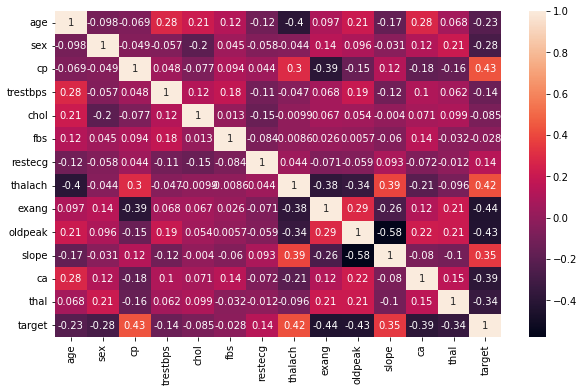

In [12]:
sns.heatmap(df.corr(),annot=True);

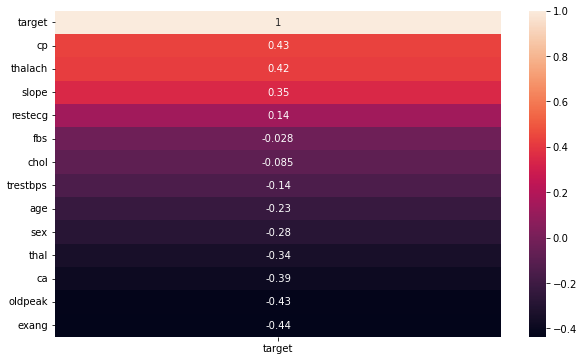

In [15]:
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), 
            vmax = 1,
            annot=True, 
            )
plt.show()

<AxesSubplot:>

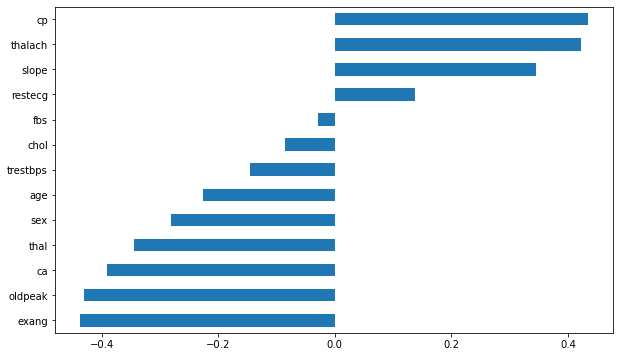

In [17]:
df.corr()["target"].drop("target").sort_values().plot.barh()

# Data Preprocessing

In [18]:
X = df.drop('target',axis=1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit_transform(X_train)

array([[ 1.44921921,  0.70929937,  1.0093251 , ...,  0.94561086,
         0.25659187,  1.17065637],
       [ 1.23313107, -1.40984195, -0.92921994, ..., -0.65465367,
         1.22682988,  1.17065637],
       [-0.2794859 ,  0.70929937,  0.04005258, ...,  0.94561086,
        -0.71364614, -0.486062  ],
       ...,
       [-0.92775032,  0.70929937,  0.04005258, ...,  0.94561086,
        -0.71364614,  1.17065637],
       [-1.46797066,  0.70929937,  0.04005258, ..., -0.65465367,
        -0.71364614, -2.14278037],
       [-0.71166218, -1.40984195,  1.0093251 , ...,  0.94561086,
        -0.71364614, -0.486062  ]])

In [27]:
scaler.transform(X_test)

array([[ 0.04464631,  0.70929937, -0.92921994,  0.44206153, -0.57445787,
        -0.43831293,  0.87935746, -1.71067702,  1.47790748,  3.99137059,
        -2.2549182 , -0.71364614,  1.17065637],
       [-0.2794859 ,  0.70929937,  1.0093251 ,  2.25142965, -0.91156395,
         2.28147501,  0.87935746,  0.520688  , -0.67663234, -0.45541546,
         0.94561086, -0.71364614,  1.17065637],
       [ 0.36877852, -1.40984195, -0.92921994, -1.81964862,  0.00611372,
        -0.43831293, -1.00386825, -1.22940221, -0.67663234, -0.01945604,
        -0.65465367, -0.71364614, -0.486062  ],
       [-1.6840588 , -1.40984195,  1.0093251 ,  0.32897602, -0.51827352,
        -0.43831293,  0.87935746,  0.08316544, -0.67663234, -0.89137487,
        -0.65465367, -0.71364614, -0.486062  ],
       [ 0.58486666,  0.70929937, -0.92921994, -0.40607978,  0.19339488,
        -0.43831293, -1.00386825, -0.39810936,  1.47790748,  1.54999786,
        -0.65465367,  0.25659187,  1.17065637],
       [-0.60361811,  0.709299

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
log_model.coef_

array([[-0.08725068, -0.6417029 ,  0.89809385, -0.31557464, -0.24248918,
         0.09299338,  0.18864842,  0.3933351 , -0.47994438, -0.47415917,
         0.42376881, -0.82516775, -0.5581558 ]])

In [34]:
log_model.intercept_

array([0.24819849])

In [35]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [36]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99459645, 0.00540355],
       [0.15522764, 0.84477236],
       [0.25693359, 0.74306641],
       [0.02374954, 0.97625046],
       [0.98174361, 0.01825639],
       [0.11081562, 0.88918438],
       [0.05751249, 0.94248751],
       [0.98592779, 0.01407221],
       [0.960748  , 0.039252  ],
       [0.16562719, 0.83437281],
       [0.97003167, 0.02996833],
       [0.23679849, 0.76320151],
       [0.94991998, 0.05008002],
       [0.59713932, 0.40286068],
       [0.07603945, 0.92396055],
       [0.18632361, 0.81367639],
       [0.01292489, 0.98707511],
       [0.24909519, 0.75090481],
       [0.15253405, 0.84746595],
       [0.99074853, 0.00925147],
       [0.99107583, 0.00892417],
       [0.32351429, 0.67648571],
       [0.32238315, 0.67761685],
       [0.28572102, 0.71427898],
       [0.58211298, 0.41788702],
       [0.03292785, 0.96707215],
       [0.98029134, 0.01970866],
       [0.21517323, 0.78482677],
       [0.97039574, 0.02960426],
       [0.94742646, 0.05257354],
       [0.

In [37]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.6000,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5000,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0000,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0000,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8000,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.6000,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4000,2,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2000,1,1,3,0
240,70,1,2,160,269,0,1,112,1,2.9000,1,1,3,0
117,56,1,3,120,193,0,0,162,0,1.9000,1,0,3,1


In [38]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.6000,0,0,3,0,0.0054
8,52,1,2,172,199,1,1,162,0,0.5000,2,0,3,1,0.8448
89,58,0,0,100,248,0,0,122,0,1.0000,1,0,2,1,0.7431
154,39,0,2,138,220,0,1,152,0,0.0000,1,0,2,1,0.9763
201,60,1,0,125,258,0,0,141,1,2.8000,1,1,3,0,0.0183
12,49,1,1,130,266,0,1,171,0,0.6000,2,0,2,1,0.8892
65,35,0,0,138,183,0,1,182,0,1.4000,2,0,2,1,0.9425
187,54,1,0,124,266,0,0,109,1,2.2000,1,1,3,0,0.0141
240,70,1,2,160,269,0,1,112,1,2.9000,1,1,3,0,0.0393
117,56,1,3,120,193,0,0,162,0,1.9000,1,0,3,1,0.8344


In [39]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.6000,0,0,3,0,0.0054,0
8,52,1,2,172,199,1,1,162,0,0.5000,2,0,3,1,0.8448,1
89,58,0,0,100,248,0,0,122,0,1.0000,1,0,2,1,0.7431,1
154,39,0,2,138,220,0,1,152,0,0.0000,1,0,2,1,0.9763,1
201,60,1,0,125,258,0,0,141,1,2.8000,1,1,3,0,0.0183,0
12,49,1,1,130,266,0,1,171,0,0.6000,2,0,2,1,0.8892,1
65,35,0,0,138,183,0,1,182,0,1.4000,2,0,2,1,0.9425,1
187,54,1,0,124,266,0,0,109,1,2.2000,1,1,3,0,0.0141,0
240,70,1,2,160,269,0,1,112,1,2.9000,1,1,3,0,0.0393,0
117,56,1,3,120,193,0,0,162,0,1.9000,1,0,3,1,0.8344,1


In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [41]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [42]:
log_model.score(X_test_scaled, y_test)

0.8360655737704918

In [43]:
precision_score(y_test, y_pred)

0.7777777777777778

In [44]:
recall_score(y_test, y_pred)

0.9333333333333333

In [45]:
f1_score(y_test,y_pred)

0.8484848484848485

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [50]:
confusion_matrix(y_test,y_pred)

array([[23,  8],
       [ 2, 28]], dtype=int64)

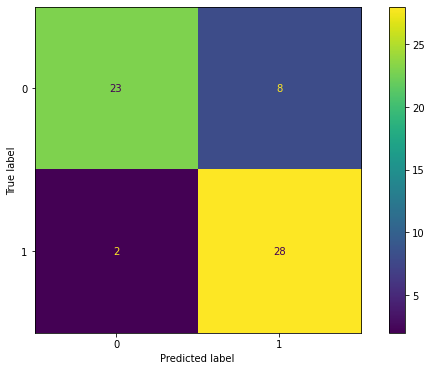

In [52]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

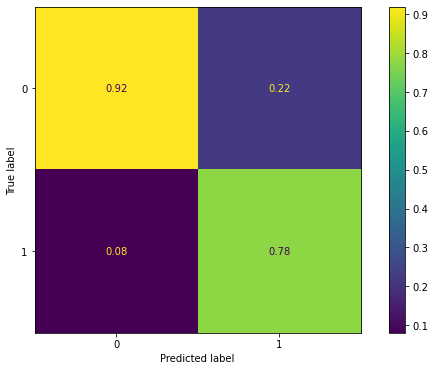

In [53]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [54]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



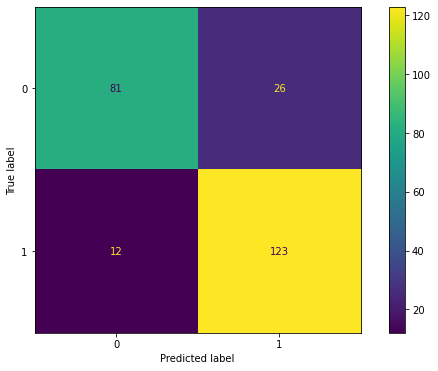

In [55]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

###  CV

In [56]:
from sklearn.model_selection import cross_validate

In [57]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.0040,0.0040,0.8400,0.8571,0.8571,0.8571
2,0.0040,0.0030,0.8000,0.8000,0.8571,0.8276
3,0.0050,0.0030,0.8333,0.8125,0.9286,0.8667
4,0.0040,0.0020,0.7083,0.7059,0.8571,0.7742
5,0.0030,0.0020,0.8750,0.9231,0.8571,0.8889
6,0.0030,0.0020,0.8333,0.8462,0.8462,0.8462
7,0.0020,0.0030,0.7917,0.7857,0.8462,0.8148
8,0.0030,0.0020,0.6250,0.6429,0.6923,0.6667
9,0.0040,0.0020,0.8750,0.8571,0.9231,0.8889
10,0.0030,0.0020,0.9583,1.0000,0.9231,0.9600


In [59]:
df_scores.mean()[2:]

test_accuracy    0.8140
test_precision   0.8230
test_recall      0.8588
test_f1          0.8391
dtype: float64

In [60]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20) # aradaki değerleri linear olarak dağıtıyor.
C = np.logspace(0, 10, 20)  # aradaki değerleri logaritmik olarak dağıtıyor.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [65]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [66]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [67]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [68]:
grid_model.best_score_

0.8225340136054422

In [69]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

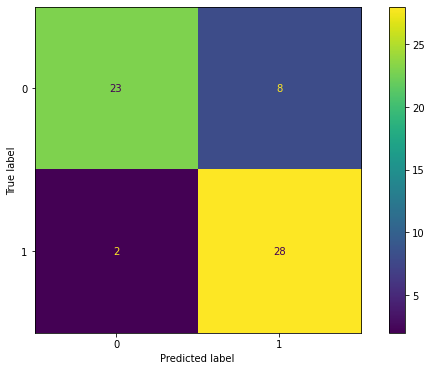

In [70]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  8]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [72]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[23  8]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61


Train_Set
[[ 81  26]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



# Implement KNN and Evaluate

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
error = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=10)
    error.append(mean_squared_error(y,y_pred)) 

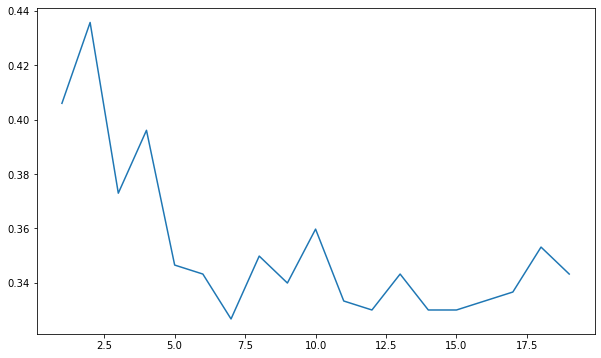

In [75]:
plt.plot(range(1,20),error)

In [78]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [79]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [81]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [82]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [83]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.0000,0.0000
1,0.0000,1.0000
2,0.0000,1.0000
3,0.0000,1.0000
4,1.0000,0.0000
5,0.0000,1.0000
6,0.0000,1.0000
7,1.0000,0.0000
8,0.8000,0.2000
9,0.4000,0.6000


In [84]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[26  5]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set
[[ 85  22]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       107
           1       0.85      0.90      0.87       135

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [85]:
knn_grid = KNeighborsClassifier()

In [86]:
param_grid = {"n_neighbors":range(1,30), "p": [1,2], "weights": ['uniform', "distance"]}

In [87]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [88]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
knn_grid_model.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

In [90]:
y_pred = knn_grid_model.predict(X_test_scaled)

In [91]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



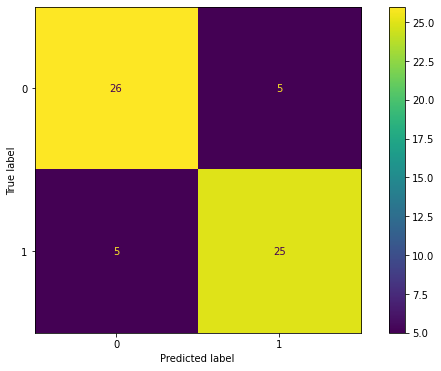

In [92]:
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

In [94]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve,plot_confusion_matrix

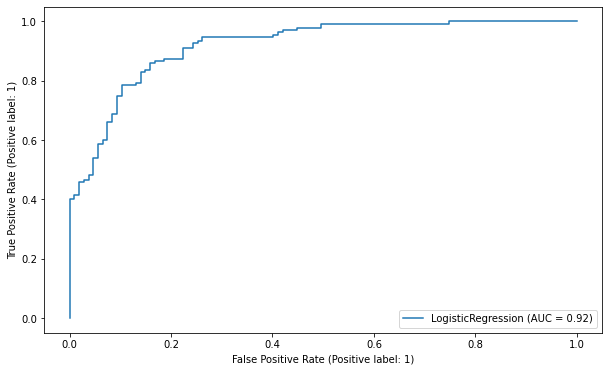

In [95]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [96]:
y_pred_proba = log_model.predict_proba(X_train_scaled) 
roc_auc_score(y_train, y_pred_proba[:,1])

0.919349255797854

In [97]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [98]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5933006697574766

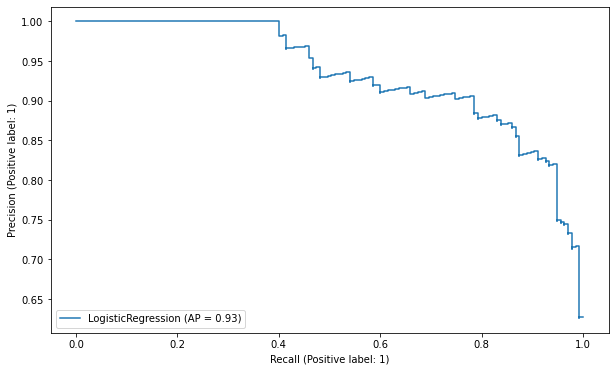

In [99]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [100]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9335418411706576

In [101]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [102]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3635884428693852

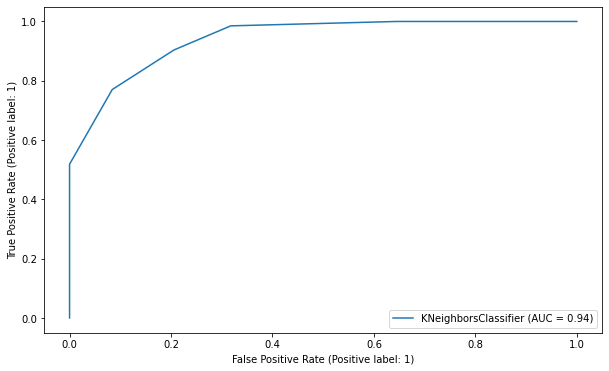

In [103]:
plot_roc_curve(knn_model, X_train_scaled, y_train);

In [104]:
y_pred_proba = knn_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9416407061266874

In [105]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [106]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6

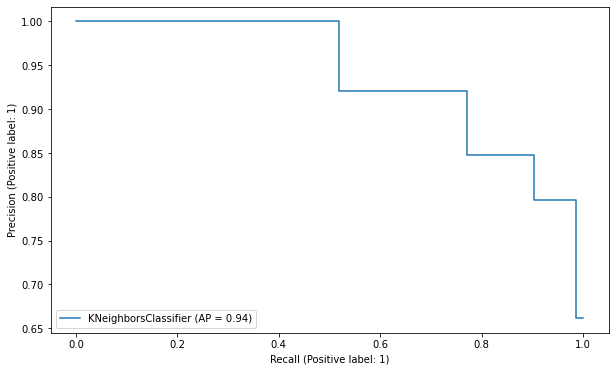

In [107]:
plot_precision_recall_curve(knn_model, X_train_scaled, y_train);

In [108]:
y_pred_proba = knn_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9379706951993405

In [109]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [110]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4

# Chose best model and make a random prediction 

In [111]:
scaler = StandardScaler().fit(X)

In [112]:
import pickle
pickle.dump(scaler, open("scaler_Heart_Stroke_Prediction", 'wb'))

In [113]:
final_X_scaled = scaler.fit_transform(X)

In [114]:
final_knn_model = KNeighborsClassifier(n_neighbors = 12, p = 1, weights = 'distance').fit(final_X_scaled, y)

In [115]:
pickle.dump(final_knn_model, open("final_model_Heart_Stroke_Prediction", 'wb'))

In [116]:
my_dict = {"age": [20,30,40,50,60],
           "sex":[0,1,1,1,0],
           "cp":[1,3,0,3,2],
           "trestbps": [110,90,100,80,110],
           "chol": [200,210,220,220,240],
           "fbs": [1,1,0,1,0],
           "restecg": [1,0,1,0,0],
           "thalach": [150,160,140,180,190],
           "exang": [0,1,0,1,1],
           "oldpeak": [0.90,1.20,2.30,1.90,1.50],
           "slope": [1,2,0,2,1],
           "ca": [1,3,0,4,2],
           "thal": [1,3,3,2,1]
          }

In [117]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,20,0,1,110,200,1,1,150,0,0.9000,1,1,1
1,30,1,3,90,210,1,0,160,1,1.2000,2,3,3
2,40,1,0,100,220,0,1,140,0,2.3000,0,0,3
3,50,1,3,80,220,1,0,180,1,1.9000,2,4,2
4,60,0,2,110,240,0,0,190,1,1.5000,1,2,1


In [118]:
scaler_Heart_Stroke_Prediction = pickle.load(open("scaler_Heart_Stroke_Prediction", "rb"))

In [119]:
sample_scaled = scaler_Heart_Stroke_Prediction.transform(sample)
sample_scaled

array([[-3.79022294, -1.46841752,  0.03203122, -1.23499586, -0.89407462,
         2.394438  ,  0.89896224,  0.01544279, -0.69663055, -0.12043572,
        -0.64911323,  0.26508221, -2.14887271],
       [-2.68733467,  0.68100522,  1.97312292, -2.37725393, -0.7008198 ,
         2.394438  , -1.00583187,  0.45274783,  1.43548113,  0.13837295,
         0.97635214,  2.22410436,  1.12302895],
       [-1.58444641,  0.68100522, -0.93851463, -1.80612489, -0.50756498,
        -0.41763453,  0.89896224, -0.42186226, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887,  1.12302895],
       [-0.48155814,  0.68100522,  1.97312292, -2.94838297, -0.50756498,
         2.394438  , -1.00583187,  1.32735793,  1.43548113,  0.74225984,
         0.97635214,  3.20361543, -0.51292188],
       [ 0.62133012, -1.46841752,  1.00257707, -1.23499586, -0.12105533,
        -0.41763453, -1.00583187,  1.76466298,  1.43548113,  0.39718162,
        -0.64911323,  1.24459328, -2.14887271]])

In [120]:
final_model=pickle.load(open("final_model_Heart_Stroke_Prediction", 'rb')) 

In [121]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [123]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample["pred2"] = predictions2
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred_0.50,pred_0.6,pred,pred2
0,20,0,1,110,200,1,1,150,0,0.9000,1,1,1,0.9129,1,1,1,1
1,30,1,3,90,210,1,0,160,1,1.2000,2,3,3,0.6458,1,1,1,1
2,40,1,0,100,220,0,1,140,0,2.3000,0,0,3,0.2174,0,0,0,0
3,50,1,3,80,220,1,0,180,1,1.9000,2,4,2,0.6060,1,1,1,1
4,60,0,2,110,240,0,0,190,1,1.5000,1,2,1,0.5663,1,1,1,1
